## Q1 and Q2

In [343]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
import pandas as pd
from selenium.webdriver.support.ui import WebDriverWait
import time
import re
import requests
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException, NoSuchElementException, ElementClickInterceptedException

In [69]:
options = Options()
options.add_experimental_option("detach", True) # To keep the browser open 

driver = webdriver.Chrome(service = Service(ChromeDriverManager().install()), options=options) # Initializing the web driver according to the chrome version 

driver.get('https://www.amazon.in/')

In [70]:
search_obj = input("Enter the item to be search on amazon")

search_bar = driver.find_element(By.XPATH, '/html/body/div[1]/header/div/div[1]/div[2]/div/form/div[2]/div[1]/input')
search_bar.send_keys(search_obj)

search_button = driver.find_element(By.XPATH, '/html/body/div[1]/header/div/div[1]/div[2]/div/form/div[3]/div/span/input')
search_button.click()

Enter the item to be search on amazonguitar


In [71]:
product_urls = []

product_url = driver.find_elements(By.XPATH,"//h2[@class='a-size-mini a-spacing-none a-color-base s-line-clamp-4']/a")
for i in product_url:
    product_urls.append(i.get_attribute('href'))
    
time.sleep(5)
    
next_button = driver.find_element(By.XPATH, "//a[text()='Next']")
next_button.click()

time.sleep(5)

product_url = driver.find_elements(By.XPATH,"//h2[@class='a-size-mini a-spacing-none a-color-base s-line-clamp-4']/a")
for i in product_url:
    product_urls.append(i.get_attribute('href'))
    

time.sleep(5)
    
next_button = driver.find_element(By.XPATH, "//a[text()='Next']")
next_button.click()

time.sleep(5)

product_url = driver.find_elements(By.XPATH,"//h2[@class='a-size-mini a-spacing-none a-color-base s-line-clamp-4']/a")
for i in product_url:
    product_urls.append(i.get_attribute('href'))
    


In [72]:
len(product_urls)

169

In [73]:
brand_names = []
product_names = []
prices = []
returns = []
expected_deliveries = []
availabilities = []

for i in product_urls:
    try :
        driver.get(i)
        
        # brand names
        
        try:
            brand_name = driver.find_element(By.XPATH, "//tr[@class='a-spacing-small po-brand']/td[2]/span")
            brand_names.append(brand_name.text)
            
        except NoSuchElementException:
            brand_names.append("-")
            
        # Prices
        
        try:
            price = driver.find_element(By.XPATH, "//div[@class='a-section a-spacing-none aok-align-center aok-relative']/span/span/span[2]")
            prices.append(price.text)
            
        except NoSuchElementException:
            prices.append("-")   
            
        # Returns
        
        try:
            return_1 = driver.find_element(By.XPATH, "//div[@data-name='RETURNS_POLICY']/span/div[2]/span")
            returns.append(return_1.text)
            
        except NoSuchElementException:
            returns.append("-")
            
        # Expected Deliveries
        
        try:
            expected_delivery = driver.find_element(By.XPATH, "//div[@id='mir-layout-DELIVERY_BLOCK']/div/span/span[1]")
            expected_deliveries.append(expected_delivery.text)
            
        except NoSuchElementException:
            expected_deliveries.append("-") 
            
        # Avaliabilities
        
        try:
            availability = driver.find_element(By.XPATH, "//div[@id='availability']/span")
            availabilities.append(availability.text)
            
        except NoSuchElementException:
            availabilities.append("-")  
            
        # Product Name
        
        try:
            product_name = driver.find_element(By.XPATH, "//div[@id='titleSection']/h1/span")
            product_names.append(product_name.text)
            
        except NoSuchElementException:
            product_names.append("-")       
        
            
        
    except NoSuchElementException:
        brand_names.append("-")
        prices.append("-")
        returns.append("-")
        expected_deliveries.append("-")
        availabilities.append("-")
        product_names.append("-")

In [74]:
brand_names

['Intern',
 'Kadence',
 'Kadence',
 'Kadence',
 'JUAREZ',
 'Intern',
 'Medellin',
 'REVEL',
 'JUAREZ',
 'JUAREZ',
 'YAMAHA',
 'Intern',
 'Intern',
 'Medellin',
 'Intern',
 'JUAREZ',
 'Henrix',
 'Kadence',
 'REVEL',
 'blueberry',
 'Intern',
 'Intern',
 'VAULT',
 'SG Musical',
 'Medellin',
 'Kadence',
 'Yamaha',
 'YAMAHA',
 'Intern',
 'Belear',
 'blueberry',
 'YAMAHA',
 'JUAREZ',
 'Kadence',
 'JUAREZ',
 'Kadence',
 'blueberry',
 'YAMAHA',
 'Yamaha',
 'ENYA',
 '-',
 'Yamaha',
 'VAULT',
 'Yamaha',
 'Intern',
 'JUAREZ',
 'VAULT',
 'Medellin',
 'Fender',
 'JUAREZ',
 'Kadence',
 'YAMAHA',
 'ENYA',
 'REVEL',
 'Fender',
 'JUAREZ',
 'Gum-Tea',
 'SG Musical',
 'Professional Wood Craft',
 'American-Elm',
 'Intern',
 'Kadence',
 'Intern',
 'Intern',
 'VAULT',
 'Kadence',
 'Fender',
 'Yamaha',
 'Kadence',
 'VAULT',
 'Yamaha',
 'Yamaha',
 'JUAREZ',
 'VAULT',
 'YAMAHA',
 'Neowood',
 'Kadence',
 'Yamaha',
 'blueberry',
 'REVEL',
 'American-Elm',
 '-',
 '-',
 '-',
 'JUAREZ',
 'Kadence',
 'Intern',
 'Bel

In [75]:
len(brand_names)

169

In [76]:
product_names

['Intern INT-38C Right hand Acoustic Guitar Kit, With Bag, Strings, Pick And Strap, Black, small',
 'Kadence rosewood Guitar Frontier Series, Electric Acoustic Black Guitar With EQ, Die Cast Keys, Set Of Strings, Strap, Picks And Bag (Black EQ, Electric Acoustic)',
 'Kadence Frontier guitar with Online Guitar learning course , Wine Red Acoustic Guitar with Die Cast Keys, Set of Strings, Strap, Picks and Bag (Wine Red, Acoustic)',
 'Kadence Slowhand Premium Jumbo Semi Acoustic Guitar with Heavy Padded Bag, guitar cable, Pro Capo (Black Spruce Wood)',
 'Juârez Acoustic Guitar Kit, 38 Inch Cutaway, 038C with Bag, Strings, Pick and Strap, Black',
 'Intern INT-38C Right hand Acoustic Guitar Kit, With Bag, Strings, Pick And Strap, Black, small',
 'Medellin 38” Acoustic Guitar with (free learning course) Matt finish with Picks(Blue)',
 'Revel 38 Inches Cutaway Design Acoustic Guitar with Carry bag and Plectrums. Great tone and Beginner/Learners standard size configuration for all age groups (

In [77]:
len(product_names)

169

In [78]:
prices

['2,180',
 '4,899',
 '4,499',
 '8,999',
 '2,199',
 '2,180',
 '1,849',
 '1,999',
 '2,199',
 '2,199',
 '7,399',
 '2,199',
 '2,199',
 '1,849',
 '2,199',
 '1,865',
 '3,299',
 '4,899',
 '1,949',
 '2,365',
 '3,499',
 '4,399',
 '4,399',
 '549',
 '2,299',
 '4,499',
 '8,485',
 '12,280',
 '1,999',
 '2,699',
 '2,750',
 '7,770',
 '1,739',
 '14,499',
 '1,865',
 '5,999',
 '2,370',
 '9,899',
 '7,799',
 '17,000',
 '379',
 '7,900',
 '4,899',
 '9,441',
 '2,149',
 '2,748',
 '5,799',
 '1,999',
 '25,000',
 '2,587',
 '5,999',
 '11,245',
 '28,999',
 '1,861',
 '-',
 '-',
 '4,997',
 '599',
 '699',
 '209',
 '2,199',
 '9,999',
 '3,499',
 '4,399',
 '4,899',
 '6,999',
 '17,299',
 '17,399',
 '9,999',
 '7,399',
 '9,299',
 '11,499',
 '6,750',
 '4,899',
 '11,720',
 '5,234',
 '12,499',
 '7,690',
 '2,849',
 '-',
 '189',
 '766',
 '319',
 '299',
 '6,750',
 '3,799',
 '4,351',
 '2,899',
 '4,499',
 '3,799',
 '3,199',
 '24,649',
 '11,245',
 '15,309',
 '23,879',
 '2,849',
 '2,299',
 '3,290',
 '2,699',
 '79,319',
 '3,199',
 '4,

In [79]:
len(prices)

169

In [80]:
returns

['7 days Replacement',
 '7 days Replacement',
 '7 days Replacement',
 '7 days Replacement',
 '7 days Replacement',
 '7 days Replacement',
 '7 days Replacement',
 '7 days Replacement',
 '7 days Replacement',
 '7 days Replacement',
 '7 days Replacement',
 '7 days Replacement',
 '7 days Replacement',
 '7 days Replacement',
 '7 days Replacement',
 '7 days Replacement',
 '7 days Replacement',
 '7 days Replacement',
 '7 days Replacement',
 '7 days Replacement',
 '7 days Replacement',
 '7 days Replacement',
 '7 days Replacement',
 '10 days Returnable',
 '7 days Replacement',
 '7 days Replacement',
 '7 days Replacement',
 '7 days Replacement',
 '7 days Replacement',
 '7 days Replacement',
 '7 days Replacement',
 '7 days Replacement',
 '7 days Replacement',
 '7 days Replacement',
 '7 days Replacement',
 '7 days Replacement',
 '7 days Replacement',
 '7 days Replacement',
 '7 days Replacement',
 '7 days Replacement',
 '10 days Returnable',
 '7 days Replacement',
 '7 days Replacement',
 '7 days Re

In [81]:
len(returns)

169

In [82]:
expected_deliveries

['Saturday, 1 June',
 'Saturday, 1 June',
 'Saturday, 1 June',
 'Monday, 3 June',
 'Saturday, 1 June',
 'Saturday, 1 June',
 'Monday, 3 June',
 'Sunday, 2 June',
 'Saturday, 1 June',
 'Saturday, 1 June',
 'Thursday, 6 June',
 'Saturday, 1 June',
 'Sunday, 2 June',
 'Saturday, 1 June',
 'Saturday, 1 June',
 'Saturday, 1 June',
 'Saturday, 1 June',
 'Saturday, 1 June',
 'Saturday, 1 June',
 'Tuesday, 4 June',
 'Sunday, 2 June',
 'Sunday, 2 June',
 'Saturday, 1 June',
 'Sunday, 9 June',
 'Monday, 3 June',
 'Saturday, 1 June',
 'Thursday, 6 June',
 'Wednesday, 5 June',
 'Saturday, 1 June',
 'Tuesday, 4 June',
 'Tuesday, 4 June',
 'Sunday, 2 June',
 'Monday, 3 June',
 'Monday, 3 June',
 'Saturday, 1 June',
 'Saturday, 1 June',
 'Tuesday, 4 June',
 'Saturday, 1 June',
 'Sunday, 2 June',
 'Saturday, 1 June',
 'Monday, 3 June',
 'Saturday, 1 June',
 'Saturday, 1 June',
 'Saturday, 1 June',
 'Saturday, 1 June',
 'Saturday, 1 June',
 'Saturday, 1 June',
 'Saturday, 1 June',
 'Sunday, 2 June',
 '

In [83]:
availabilities

['In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'Only 1 left in stock.',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'Only 1 left in stock.',
 'In stock',
 'In stock',
 'In stock',
 'Available to ship in 1-2 days',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'Only 2 left in stock.',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'Only 2 left in stock.',
 'In stock',
 'In stock',
 'In stock',
 'Only 2 left in stock.',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 '',
 'In stock',
 'In stock',
 'In stock',
 'Only 1 left in stock.',
 'In stock',
 'In stock',
 'In stock',
 'Only 1 left in stock.',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',

In [86]:
df = pd.DataFrame({"Brand": brand_names, "Product Name": product_names, "Price": prices, "Returns/Exchange": returns, "Expected Delivery":expected_deliveries, "Avaliability": availabilities, "Product URL":product_urls})

In [87]:
df

,Brand,Product Name,Price,Returns/Exchange,Expected Delivery,Avaliability,Product URL
0,Intern,"Intern INT-38C Right hand Acoustic Guitar Kit,...","2,180",7 days Replacement,"Saturday, 1 June",In stock,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
1,Kadence,"Kadence rosewood Guitar Frontier Series, Elect...","4,899",7 days Replacement,"Saturday, 1 June",In stock,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
2,Kadence,Kadence Frontier guitar with Online Guitar lea...,"4,499",7 days Replacement,"Saturday, 1 June",In stock,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
3,Kadence,Kadence Slowhand Premium Jumbo Semi Acoustic G...,"8,999",7 days Replacement,"Monday, 3 June",In stock,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
4,JUAREZ,"Juârez Acoustic Guitar Kit, 38 Inch Cutaway, 0...","2,199",7 days Replacement,"Saturday, 1 June",In stock,https://www.amazon.in/Juarez-Acoustic-Cutaway-...
...,...,...,...,...,...,...,...
164,VAULT,Vault CL-40 4/4 size Premium Solid Spruce-Top ...,"7,499",7 days Replacement,"Saturday, 1 June",In stock,https://www.amazon.in/CL-40-Premium-Spruce-Top...
165,Yamaha,Yamaha F310-Tbs Right Handed Acoustic Guitar (...,"9,990",7 days Replacement,"Wednesday, 5 June",In stock,https://www.amazon.in/Yamaha-Acoustic-Guitar-T...
166,Fender,Fender Squier 39 Inch 6 String Cutaway Acousti...,"8,200",7 days Replacement,"Sunday, 2 June",In stock,https://www.amazon.in/Fender-String-Cutaway-Ac...
167,VAULT,Vault RG1 Soloist Premium Electric Guitar - Tr...,"11,999",7 days Replacement,"Saturday, 1 June",In stock,https://www.amazon.in/Soloist-Premium-Electric...


In [88]:
df.to_csv("Amazon_products.csv")

## Q3 

In [95]:
options = Options()
options.add_experimental_option("detach", True) # To keep the browser open 

driver = webdriver.Chrome(service = Service(ChromeDriverManager().install()), options=options) # Initializing the web driver according to the chrome version 

driver.get('https://images.google.com/')

search_bar = driver.find_element(By.XPATH, "/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/textarea")
search_bar.send_keys("Fruits")

In [97]:
search_button = driver.find_element(By.XPATH, "/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/button")
search_button.click()

In [116]:
fruits =[]

try:
    fruit = driver.find_elements(By.XPATH, "//img[@class='YQ4gaf']")
    for j in fruit[0:10]:
        fruits.append(j.get_attribute('src'))
        
except NoSuchElementException:
    print("Change the path and try again")

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '']
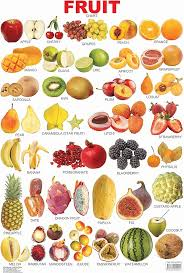
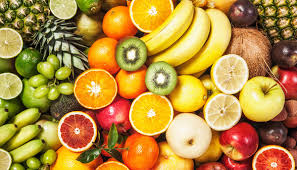
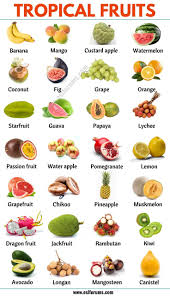
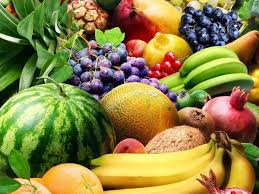
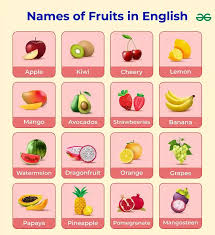
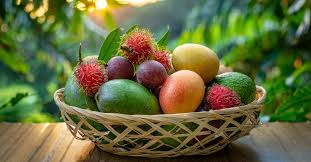
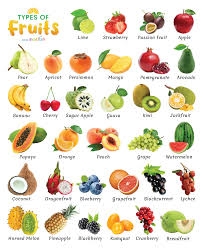
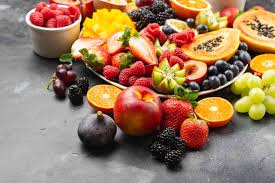
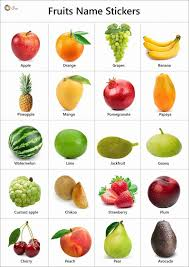
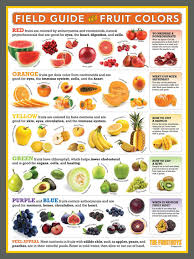

In [117]:
fruits

In [118]:
options = Options()
options.add_experimental_option("detach", True) # To keep the browser open 

driver = webdriver.Chrome(service = Service(ChromeDriverManager().install()), options=options) # Initializing the web driver according to the chrome version 

driver.get('https://images.google.com/')

search_bar = driver.find_element(By.XPATH, "/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/textarea")
search_bar.send_keys("Cars")

In [119]:
search_button = driver.find_element(By.XPATH, "/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/button")
search_button.click()

In [120]:
cars =[]

try:
    car = driver.find_elements(By.XPATH, "//img[@class='YQ4gaf']")
    for j in car[0:10]:
        cars.append(j.get_attribute('src'))
        
except NoSuchElementException:
    print("Change the path and try again")

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '']
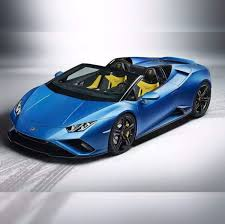
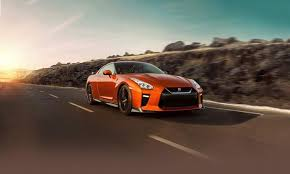
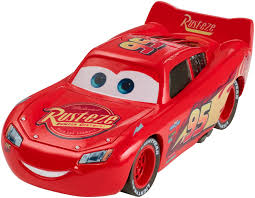
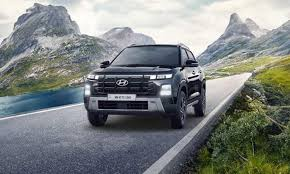
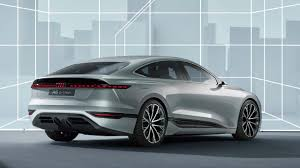
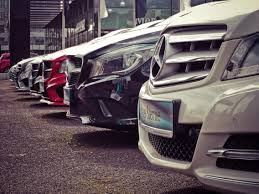
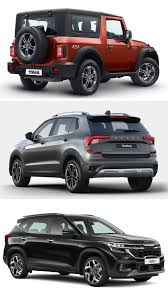
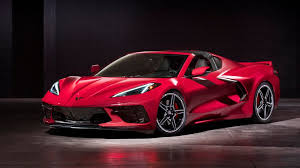
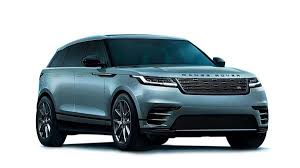
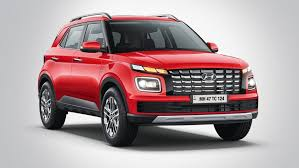

In [124]:
cars

In [127]:
options = Options()
options.add_experimental_option("detach", True) # To keep the browser open 

driver = webdriver.Chrome(service = Service(ChromeDriverManager().install()), options=options) # Initializing the web driver according to the chrome version 

driver.get('https://images.google.com/')

search_bar = driver.find_element(By.XPATH, "/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/textarea")
search_bar.send_keys("Machine Learning")

In [128]:
search_button = driver.find_element(By.XPATH, "/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/button")
search_button.click()

In [134]:
machine_learnings =[]

try:
    machine_learning = driver.find_elements(By.XPATH, "//img[@class='rg_i Q4LuWd']")
    for j in machine_learning[0:10]:
        machine_learnings.append(j.get_attribute('src'))
        
except NoSuchElementException:
    print("Change the path and try again")

''
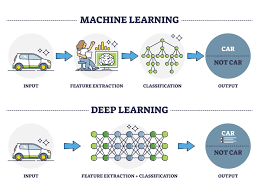

In [136]:
machine_learnings

In [137]:
options = Options()
options.add_experimental_option("detach", True) # To keep the browser open 

driver = webdriver.Chrome(service = Service(ChromeDriverManager().install()), options=options) # Initializing the web driver according to the chrome version 

driver.get('https://images.google.com/')

search_bar = driver.find_element(By.XPATH, "/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/textarea")
search_bar.send_keys("Guitar")

In [138]:
search_button = driver.find_element(By.XPATH, "/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/button")
search_button.click()

In [141]:
guitars =[]

try:
    guitar = driver.find_elements(By.XPATH, "//img[@class='YQ4gaf']")
    for j in guitar[0:10]:
        guitars.append(j.get_attribute('src'))
        
except NoSuchElementException:
    print("Change the path and try again")

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '']
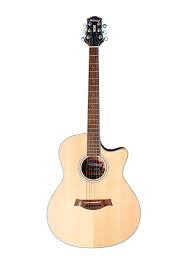
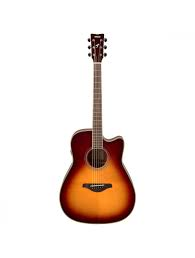
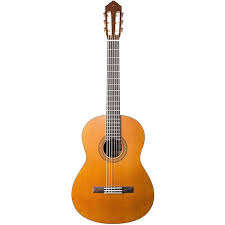
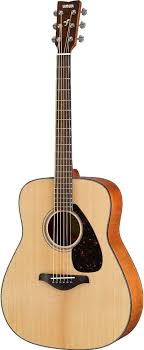
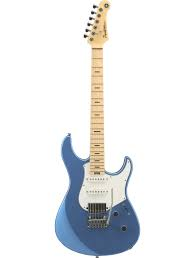
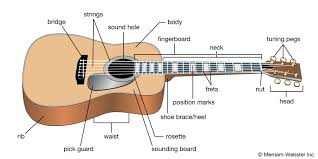
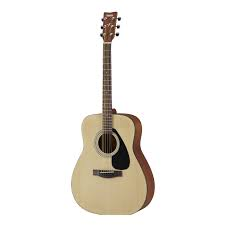
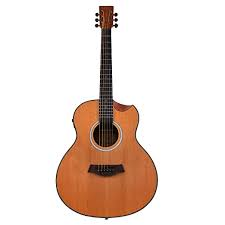
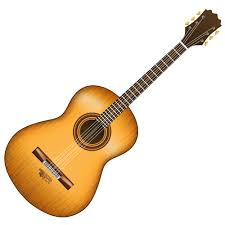
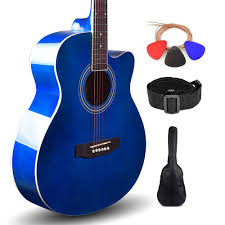

In [142]:
guitars

# Downloading only cake images as mentioned in the Doubt Session

In [370]:
options = Options()
options.add_experimental_option("detach", True) # To keep the browser open 

driver = webdriver.Chrome(service = Service(ChromeDriverManager().install()), options=options) # Initializing the web driver according to the chrome version 

driver.get('https://images.google.com/')

search_bar = driver.find_element(By.XPATH, "/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/textarea")
search_bar.send_keys("Cakes")

In [371]:
search_button = driver.find_element(By.XPATH, "/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/button")
search_button.click()

In [372]:
for _ in range(20):
    driver.execute_script("window.scrollBy(0,500)")

cakes = []
count = 0

try:
    cake = driver.find_elements(By.XPATH, "//img[@class='YQ4gaf']")
    for j in cake:
        s = j.get_attribute('src')
        if s[0:4] == 'http' and count < 10:
            cakes.append(s)
            count = count + 1
        
except NoSuchElementException:
    print("Change the path and try again")

In [373]:
cakes

['https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTmQfHRm5Q-87I9qZ6dpUZgHQHTAwbQgLsYRQ&s',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQSZIggclFXvbpMmeRZC4KcdRoN8DWaYDgkuA&s',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRKdwi2FfFtOcykQRNLFTVmDz3T7ZnNtvGaMw&s',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSVwzYvlLk5KC3NEskBIiKjM_1RVBbCDM25qA&s',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRaXd71Yg4O1_tAMoAdp95ukIT2oitZi5aMqg&s',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT9LBPfuzl1jm6z0aZRP4ED98Y3BfzWKQ8Kag&s',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQA7yxW1Bs-zQ3-_uKM5oIZf4IW_ZKF6LWLRw&s',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT8IFa6T7Hr7DV6u6-S17w3XhHBGuau75Y5SQ&s',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSU4H4eHRjAnIFH_Ib0yMyglP0oogyzmeCSWQ&s',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQSlqaB8kiJd9BzLgSn3Ab_h_Ht7B-4cnH5JA&s']

In [378]:
c = 0
for i in cakes:
    response = requests.get(i)
    file = open(r"C:\Users\hp\OneDrive\Desktop\Images" + str(c) + '.jpg', 'wb')
    file.write(response.content)
    c = c + 1

## Q4 

In [46]:
options = Options()
options.add_experimental_option("detach", True) # To keep the browser open 

driver = webdriver.Chrome(service = Service(ChromeDriverManager().install()), options=options) # Initializing the web driver according to the chrome version 

driver.get('https://www.flipkart.com/')

In [47]:
search_bar = driver.find_element(By.XPATH, "/html/body/div[1]/div/div[1]/div/div/div/div/div[1]/div/div[1]/div/div[1]/div[1]/header/div[1]/div[2]/form/div/div/input")
search_bar.send_keys('iphone')

In [48]:
search_button = driver.find_element(By.XPATH, "/html/body/div[1]/div/div[1]/div/div/div/div/div[1]/div/div[1]/div/div[1]/div[1]/header/div[1]/div[2]/form/div/button")
search_button.click()

In [49]:
product_urls = []

urls = driver.find_elements(By.XPATH, "//a[@class='CGtC98']")
for i in urls:
    product_urls.append(i.get_attribute('href'))

In [50]:
len(product_urls)

24

In [51]:
brand_names = []
smartphone_names = []
colours = []
rams = []
roms = []
primary_cameras = []
secondary_cameras = []
display_sizes = []
battery_capacities = []
prices = []



for i in product_urls:
    try :
        driver.get(i)  
        
        # brand_names
        
        try:
            read_more_button = driver.find_element(By.XPATH, "//button[@class='QqFHMw _4FgsLt']")
            read_more_button.click()
            brand_name = driver.find_element(By.XPATH, "/html/body/div[1]/div/div[3]/div[1]/div[2]/div[9]/div[5]/div/div[2]/div[1]/div[3]/table/tbody/tr[2]/td[2]/ul/li")
            brand_names.append(brand_name.text)
            
        except NoSuchElementException:
            brand_names.append("-")
            
        #smartphone_names
            
        try:
            smartphone_name = driver.find_element(By.XPATH, "/html/body/div[1]/div/div[3]/div[1]/div[2]/div[9]/div[5]/div/div[2]/div[1]/div[1]/table/tbody/tr[3]/td[2]/ul/li")
            smartphone_names.append(smartphone_name.text)
            
        except NoSuchElementException:
            smartphone_names.append("-")
            
        #colours
        
        try:
            colour = driver.find_element(By.XPATH, "/html/body/div[1]/div/div[3]/div[1]/div[2]/div[9]/div[5]/div/div[2]/div[1]/div[1]/table/tbody/tr[4]/td[2]/ul/li")
            colours.append(colour.text)
            
        except NoSuchElementException:
            colours.append("-")
            
            
        #rams
        
        try:
            ram = driver.find_element(By.XPATH, "/html/body/div[1]/div/div[3]/div[1]/div[2]/div[9]/div[5]/div/div[2]/div[1]/div[3]/table/tbody/tr[3]/td[2]/ul/li")
            rams.append(ram.text)
            
        except NoSuchElementException:
            rams.append("-")
        
        
        #roms
        
        try:
            rom = driver.find_element(By.XPATH, "/html/body/div[1]/div/div[3]/div[1]/div[2]/div[9]/div[5]/div/div[2]/div[1]/div[4]/table/tbody/tr/td[2]/ul/li")
            roms.append(rom.text)
            
        except NoSuchElementException:
            roms.append("-")
            
            
        #primary cameras
        
        try:
            primary_camera = driver.find_element(By.XPATH, "/html/body/div[1]/div/div[3]/div[1]/div[2]/div[9]/div[5]/div/div[2]/div[1]/div[5]/table/tbody/tr[2]/td[2]/ul/li")
            primary_cameras.append(primary_camera.text)
            
        except NoSuchElementException:
            primary_cameras.append("-")
            
        #secondary cameras
        
        try:
            secondary_camera = driver.find_element(By.XPATH, "/html/body/div[1]/div/div[3]/div[1]/div[2]/div[9]/div[5]/div/div[2]/div[1]/div[5]/table/tbody/tr[5]/td[2]/ul/li")
            secondary_cameras.append(secondary_camera.text)
            
        except NoSuchElementException:
            secondary_cameras.append("-")
            
        #display sizes
        
        try:
            display_size = driver.find_element(By.XPATH, "/html/body/div[1]/div/div[3]/div[1]/div[2]/div[9]/div[5]/div/div[2]/div[1]/div[2]/table/tbody/tr[1]/td[2]/ul/li")
            display_sizes.append(display_size.text)
            
        except NoSuchElementException:
            display_sizes.append("-")
            
            
        #battery capacities
        
        try:
            battery_capacity = driver.find_element(By.XPATH, "/html/body/div[1]/div/div[3]/div[1]/div[2]/div[9]/div[5]/div/div[2]/div[1]/div[10]/table/tbody/tr/td[2]/ul/li")
            if "mAh" in battery_capacity.text:
                battery_capacities.append(battery_capacity.text)
            else:
                battery_capacities.append("-")
            
        except NoSuchElementException:
            battery_capacities.append("-")
            
            
        #prices
        
        try:
            price = driver.find_element(By.XPATH, "//div[@class ='Nx9bqj CxhGGd']")
            prices.append(price.text)
            
        except NoSuchElementException:
            prices.append("-")
                 
            
    except TimeoutException:
        driver.wait(2)
        print('Timeout')
        brand_names.append("-")
        colours.append('-')
        smartphone_names.append('-')
        rams.append("-")
        roms.append("-")
        primary_cameras.append("-")
        secondary_cameras.append("-")
        display_sizes.append("-")
        battery_capacities.append("-")
        prices.append("-")
        

In [52]:
brand_names

['-',
 'Apple',
 'Apple',
 'Apple',
 'Apple',
 'Apple',
 'Apple',
 'Apple',
 'Apple',
 'Apple',
 'Apple',
 'Apple',
 'Apple',
 'Apple',
 'Apple',
 'Apple',
 'Apple',
 'Apple',
 'Apple',
 'Apple',
 'Apple',
 'Apple',
 'Apple',
 'Apple']

In [53]:
smartphone_names

['-',
 'iPhone 15',
 'iPhone 15',
 'iPhone 14 Plus',
 'iPhone 14 Plus',
 'iPhone 15',
 'iPhone 14 Plus',
 'iPhone 15',
 'iPhone 14 Plus',
 'iPhone 14',
 'iPhone 14 Plus',
 'iPhone 15 Plus',
 'iPhone 14 Plus',
 'iPhone 15',
 'iPhone 15 Plus',
 'iPhone 14 Plus',
 'iPhone 15',
 'iPhone 15',
 'iPhone 13',
 'iPhone 14 Plus',
 'iPhone 15 Plus',
 'iPhone 14 Plus',
 'iPhone 13',
 'iPhone 14 Plus']

In [54]:
colours

['-',
 'Black',
 'Pink',
 'Starlight',
 'Purple',
 'Green',
 'Midnight',
 'Blue',
 'Yellow',
 'Blue',
 '(PRODUCT)RED',
 'Pink',
 'Midnight',
 'Yellow',
 'Blue',
 'Purple',
 'Green',
 'Black',
 'Blue',
 '(PRODUCT)RED',
 'Green',
 'Blue',
 'Starlight',
 'Yellow']

In [55]:
rams

['-',
 'A16 Bionic Chip, 6 Core Processor',
 'A16 Bionic Chip, 6 Core Processor',
 'A15 Bionic Chip, 6 Core Processor',
 'A15 Bionic Chip, 6 Core Processor',
 'A16 Bionic Chip, 6 Core Processor',
 'A15 Bionic Chip, 6 Core Processor',
 'A16 Bionic Chip, 6 Core Processor',
 'A15 Bionic Chip, 6 Core Processor',
 'A15 Bionic Chip, 6 Core Processor',
 'A15 Bionic Chip, 6 Core Processor',
 'A16 Bionic Chip, 6 Core Processor',
 'A15 Bionic Chip, 6 Core Processor',
 'A16 Bionic Chip, 6 Core Processor',
 'A16 Bionic Chip, 6 Core Processor',
 'A15 Bionic Chip, 6 Core Processor',
 'A16 Bionic Chip, 6 Core Processor',
 'A16 Bionic Chip, 6 Core Processor',
 'A15 Bionic Chip',
 'A15 Bionic Chip, 6 Core Processor',
 'A16 Bionic Chip, 6 Core Processor',
 'A15 Bionic Chip, 6 Core Processor',
 'A15 Bionic Chip',
 'A15 Bionic Chip, 6 Core Processor']

In [56]:
roms

['-',
 '128 GB',
 '128 GB',
 '128 GB',
 '128 GB',
 '128 GB',
 '128 GB',
 '128 GB',
 '128 GB',
 '128 GB',
 '128 GB',
 '128 GB',
 '256 GB',
 '128 GB',
 '128 GB',
 '256 GB',
 '256 GB',
 '256 GB',
 '128 GB',
 '256 GB',
 '128 GB',
 '256 GB',
 '256 GB',
 '256 GB']

In [57]:
primary_cameras

['-',
 '48MP + 12MP',
 '48MP + 12MP',
 '12MP + 12MP',
 '12MP + 12MP',
 '48MP + 12MP',
 '12MP + 12MP',
 '48MP + 12MP',
 '12MP + 12MP',
 '12MP + 12MP',
 '12MP + 12MP',
 '48MP + 12MP',
 '12MP + 12MP',
 '48MP + 12MP',
 '48MP + 12MP',
 '12MP + 12MP',
 '48MP + 12MP',
 '48MP + 12MP',
 '12MP + 12MP',
 '12MP + 12MP',
 '48MP + 12MP',
 '12MP + 12MP',
 '12MP + 12MP',
 '12MP + 12MP']

In [58]:
secondary_cameras

['-',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 '12MP Front Camera',
 'Yes',
 'Yes',
 'Yes',
 '12MP Front Camera',
 'Yes']

In [59]:
display_sizes

['-',
 '15.49 cm (6.1 inch)',
 '15.49 cm (6.1 inch)',
 '17.02 cm (6.7 inch)',
 '17.02 cm (6.7 inch)',
 '15.49 cm (6.1 inch)',
 '17.02 cm (6.7 inch)',
 '15.49 cm (6.1 inch)',
 '17.02 cm (6.7 inch)',
 '15.49 cm (6.1 inch)',
 '17.02 cm (6.7 inch)',
 '17.02 cm (6.7 inch)',
 '17.02 cm (6.7 inch)',
 '15.49 cm (6.1 inch)',
 '17.02 cm (6.7 inch)',
 '17.02 cm (6.7 inch)',
 '15.49 cm (6.1 inch)',
 '15.49 cm (6.1 inch)',
 '15.49 cm (6.1 inch)',
 '17.02 cm (6.7 inch)',
 '17.02 cm (6.7 inch)',
 '17.02 cm (6.7 inch)',
 '15.49 cm (6.1 inch)',
 '17.02 cm (6.7 inch)']

In [60]:
battery_capacities

['-',
 '-',
 '-',
 '4323 mAh',
 '4323 mAh',
 '-',
 '4323 mAh',
 '-',
 '-',
 '3279 mAh',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '3240 mAh',
 '-',
 '-',
 '-',
 '3240 mAh',
 '-']

In [61]:
prices

['-',
 '₹66,999',
 '₹69,999',
 '₹58,999',
 '₹58,999',
 '₹64,999',
 '₹58,999',
 '₹64,999',
 '₹58,999',
 '₹56,999',
 '₹58,999',
 '₹76,999',
 '₹68,999',
 '₹64,999',
 '₹76,999',
 '₹68,999',
 '₹74,999',
 '₹74,999',
 '₹52,999',
 '₹68,999',
 '₹76,999',
 '₹68,999',
 '₹62,999',
 '₹68,999']

In [ ]:
brand_names = []
smartphone_names = []
colours = []
rams = []
roms = []
primary_cameras = []
secondary_cameras = []
display_sizes = []
battery_capacities = []
prices = []

In [64]:
df = pd.DataFrame({"Brand": brand_names, "Product": smartphone_names, "Colour": colours, "Ram": rams, "Rom": roms, "Primary_camera": primary_cameras, "Secondary_camera": secondary_cameras, "Display": display_sizes, "Battery": battery_capacities, "Price": prices})

In [65]:
df

,Brand,Product,Colour,Ram,Rom,Primary_camera,Secondary_camera,Display,Battery,Price
0,-,-,-,-,-,-,-,-,-,-
1,Apple,iPhone 15,Black,"A16 Bionic Chip, 6 Core Processor",128 GB,48MP + 12MP,Yes,15.49 cm (6.1 inch),-,"₹66,999"
2,Apple,iPhone 15,Pink,"A16 Bionic Chip, 6 Core Processor",128 GB,48MP + 12MP,Yes,15.49 cm (6.1 inch),-,"₹69,999"
3,Apple,iPhone 14 Plus,Starlight,"A15 Bionic Chip, 6 Core Processor",128 GB,12MP + 12MP,Yes,17.02 cm (6.7 inch),4323 mAh,"₹58,999"
4,Apple,iPhone 14 Plus,Purple,"A15 Bionic Chip, 6 Core Processor",128 GB,12MP + 12MP,Yes,17.02 cm (6.7 inch),4323 mAh,"₹58,999"
5,Apple,iPhone 15,Green,"A16 Bionic Chip, 6 Core Processor",128 GB,48MP + 12MP,Yes,15.49 cm (6.1 inch),-,"₹64,999"
6,Apple,iPhone 14 Plus,Midnight,"A15 Bionic Chip, 6 Core Processor",128 GB,12MP + 12MP,Yes,17.02 cm (6.7 inch),4323 mAh,"₹58,999"
7,Apple,iPhone 15,Blue,"A16 Bionic Chip, 6 Core Processor",128 GB,48MP + 12MP,Yes,15.49 cm (6.1 inch),-,"₹64,999"
8,Apple,iPhone 14 Plus,Yellow,"A15 Bionic Chip, 6 Core Processor",128 GB,12MP + 12MP,Yes,17.02 cm (6.7 inch),-,"₹58,999"
9,Apple,iPhone 14,Blue,"A15 Bionic Chip, 6 Core Processor",128 GB,12MP + 12MP,Yes,15.49 cm (6.1 inch),3279 mAh,"₹56,999"


In [67]:
df.to_csv("Phones.csv")

## Q5

In [86]:
options = Options()
options.add_experimental_option("detach", True) # To keep the browser open 

driver = webdriver.Chrome(service = Service(ChromeDriverManager().install()), options=options) # Initializing the web driver according to the chrome version 

driver.get('https://www.google.com/maps')

In [87]:
search_bar = driver.find_element(By.XPATH, "/html/body/div[1]/div[3]/div[8]/div[3]/div[1]/div[1]/div/div[2]/form/input")
search_bar.send_keys(input("Enter the city name"))

Enter the city namePune


In [88]:
search_button = driver.find_element(By.XPATH, "/html/body/div[1]/div[3]/div[8]/div[3]/div[1]/div[1]/div/div[2]/div[1]/button")
search_button.click()

In [89]:
url = driver.current_url

In [91]:
url

'https://www.google.com/maps/@18.4430541,73.8066432,15z?entry=ttu'

In [90]:
pattern = r'@([0-9.]+),([0-9.]+)'

x = re.search(pattern, url)
print("Latitude is",x.group(1))
print("Longitude is", x.group(2))

Latitude is 18.4430541
Longitude is 73.8066432


## Q6

In [186]:
options = Options()
options.add_experimental_option("detach", True) # To keep the browser open 

driver = webdriver.Chrome(service = Service(ChromeDriverManager().install()), options=options) # Initializing the web driver according to the chrome version 

driver.get('https://www.digit.in/')

In [187]:
top_10 = driver.find_element(By.XPATH, "/html/body/div[1]/header/div/div[2]/div/nav/ul/li[3]/a")
top_10.click()

In [188]:
best_laptops = driver.find_element(By.XPATH, "/html/body/div[1]/div[3]/div/div[2]/div[1]/div[4]/div[6]/p/a")
best_laptops.click()

In [189]:
names = []
operating_systems = []
displays =[]
processors = []
storages = []
rams = []
urls = []

# URL
url = driver.find_elements(By.XPATH, "//h3[@class='font130 mt0 mb10 mobilesblockdisplay ']/a")
for i in url:
    urls.append(i.get_attribute('href'))
    
    
for i in urls:
    try :
        driver.get(i)
        
        # Names
        
        try :
            name = driver.find_element(By.XPATH, "//h1[@class='floatleft tabletblockdisplay pr20 ']")
            names.append(name.text)
            
        except NoSuchElementException:
            names.append("-")
            
        # Operating systems
        
        try :
            operating_system = driver.find_element(By.XPATH, "//tr[@class='attribute_row attribute_row_basic-information']/td/table/tbody/tr[1]/td/p")
            operating_systems.append(operating_system.text)
            
        except NoSuchElementException:
            operating_systems.append("-")
            
        # Displays
               
        try :
            display = driver.find_element(By.XPATH, "//tr[@class='attribute_row attribute_row_display']/td/table/tbody/tr[1]/td/p")
            displays.append(display.text)
            
        except NoSuchElementException:
            displays.append("-")
            
        # Rams
               
        try :
            ram = driver.find_element(By.XPATH, "//tr[@class='attribute_row attribute_row_memory']/td/table/tbody/tr[1]/td/p")
            rams.append(ram.text)
            
        except NoSuchElementException:
            rams.append("-")
            
        # Storage
               
        try :
            storage = driver.find_element(By.XPATH, "//tr[@class='attribute_row attribute_row_storage']/td/table/tbody/tr[1]/td/p")
            storages.append(storage.text)
            
        except NoSuchElementException:
            storages.append("-")
            
        
            
            
    except TimeoutException:
        names.append("-")
        operating_systems.append("-")
        displays.append("-")
        rams.append("-")
        storages.append("-")
            

In [191]:
urls

['https://www.digit.in/laptops/apple-macbook-air-2023-price-348747.html',
 'https://www.digit.in/laptops/dell-xps-15.html',
 'https://www.digit.in/laptops/acer-aspire-5-a515-58gm.html',
 'https://www.digit.in/laptops/apple-macbook-pro-16-price.html',
 'https://www.digit.in/laptops/asus-zenbook-14-oled-ux3405.html',
 'https://www.digit.in/laptops/acer-predator-helios-neo-16-13th-gen-core-i7-13700hx-phn16-71-price-346677.html',
 'https://www.digit.in/laptops/lenovo-yoga-9i13th-gen-core-i7-i7-1360p-price-346092.html',
 'https://www.digit.in/laptops/asus-tuf-gaming-a16-advantage-edition-2023-fa617xs.html',
 'https://www.digit.in/laptops/hp-spectre-x360-16-f1009tx-core-i7-1260p-2022-price-301315.html',
 'https://www.digit.in/laptops/samsung-galaxy-book3-pro-np960xfg-kc2in.html']

In [192]:
names

['Apple MacBook Air 2023',
 'Dell XPS 15',
 'Acer Aspire 5 A515-58GM',
 'Apple MacBook Pro 16”',
 'ASUS Zenbook 14 OLED (UX3405)',
 'Acer Predator Helios Neo 16 PHN16-71 | 13th Gen Core I7-13700HX | RTX 4060 | 16GB',
 'Lenovo Yoga 9i 13th Gen (83B1004XIN)',
 'ASUS TUF Gaming A16 Advantage Edition (2023) FA617XS',
 'HP Spectre X360 16-F1009TX 12th Gen Core I7-1260P',
 'Samsung Galaxy Book3 Pro NP960XFG-KC2IN']

In [193]:
operating_systems

['Mac',
 'Windows 11 Home',
 'Windows 11 Home',
 'MacOS',
 'Windows 11 Pro',
 'Windows 11 Home',
 'Windows 11 Home',
 'Windows 11 Home',
 'Windows 11 Home',
 'Windows 11 Home']

In [194]:
displays

['15', '15.6', '15.6', '16', '14', '16', '14', '16', '16', '16']

In [195]:
rams

['8 GB',
 '32 GB',
 '16 GB',
 '48 GB',
 '32 GB',
 '16 GB',
 '16 GB',
 '8 GB',
 '16 GB',
 '16 GB']

In [196]:
storages

['256 GB',
 '1 TB',
 '512 GB',
 '1 TB',
 '1 TB',
 '1 TB',
 '1 TB',
 '1 TB',
 '1 TB',
 '1 TB']

## Q7

In [261]:
options = Options()
options.add_experimental_option("detach", True) # To keep the browser open 

driver = webdriver.Chrome(service = Service(ChromeDriverManager().install()), options=options) # Initializing the web driver according to the chrome version 

driver.get('https://www.forbes.com/billionaires/')

In [262]:
ranks = []
names = []
networths = []
ages = []
industries = []
sources = []
citizenships = []

while True :

    try:
        rank = driver.find_elements(By.XPATH, "//div[@class='Table_tableRow__lF_cY']/div[1]")
        for i in rank:
            ranks.append(i.text)
        
    except NoSuchElementException:
        print("Change the path")


    try:
        name = driver.find_elements(By.XPATH, "//div[@class='Table_tableRow__lF_cY']/div[2]")
        for i in name:
            names.append(i.text)
        
    except NoSuchElementException:
        print("Change the path")
    

    try:
        networth = driver.find_elements(By.XPATH, "//div[@class='Table_tableRow__lF_cY']/div[3]")
        for i in networth:
            networths.append(i.text)
        
    except NoSuchElementException:
        print("Change the path")
    

    try:
        age = driver.find_elements(By.XPATH, "//div[@class='Table_tableRow__lF_cY']/div[4]")
        for i in age:
            ages.append(i.text)
        
    except NoSuchElementException:
        print("Change the path")


    try:
        industry = driver.find_elements(By.XPATH, "//div[@class='Table_tableRow__lF_cY']/div[7]")
        for i in industry:
            industries.append(i.text)
        
    except NoSuchElementException:
        print("Change the path")


    try:
        source = driver.find_elements(By.XPATH, "//div[@class='Table_tableRow__lF_cY']/div[6]")
        for i in source:
            sources.append(i.text)
        
    except NoSuchElementException:
        print("Change the path")


    try:
        citizenship = driver.find_elements(By.XPATH, "//div[@class='Table_tableRow__lF_cY']/div[5]")
        for i in citizenship:
            citizenships.append(i.text)
        
    except NoSuchElementException:
        print("Change the path")
        
    try :
        next_button = driver.find_element(By.XPATH, "/html/body/div[1]/div[2]/div/div/div[3]/div[2]/div[2]/div/div[2]/div[27]/div[7]/div[1]/nav/div/button[7]")
        next_button.click()
        
    except NoSuchElementException:
        print("All the data has been scraped")
        break
        

try:
    rank = driver.find_elements(By.XPATH, "//div[@class='Table_tableRow__lF_cY']/div[1]")
    for i in rank:
        ranks.append(i.text)
        
except NoSuchElementException:
    print("Change the path")


try:
    name = driver.find_elements(By.XPATH, "//div[@class='Table_tableRow__lF_cY']/div[2]")
    for i in name:
        names.append(i.text)
        
except NoSuchElementException:
    print("Change the path")
    

try:
    networth = driver.find_elements(By.XPATH, "//div[@class='Table_tableRow__lF_cY']/div[3]")
    for i in networth:
        networths.append(i.text)
        
except NoSuchElementException:
    print("Change the path")
    

try:
    age = driver.find_elements(By.XPATH, "//div[@class='Table_tableRow__lF_cY']/div[4]")
    for i in age:
        ages.append(i.text)
        
except NoSuchElementException:
    print("Change the path")


try:
    industry = driver.find_elements(By.XPATH, "//div[@class='Table_tableRow__lF_cY']/div[7]")
    for i in industry:
        industries.append(i.text)
        
except NoSuchElementException:
    print("Change the path")


try:
    source = driver.find_elements(By.XPATH, "//div[@class='Table_tableRow__lF_cY']/div[6]")
    for i in source:
        sources.append(i.text)
        
except NoSuchElementException:
    print("Change the path")


try:
    citizenship = driver.find_elements(By.XPATH, "//div[@class='Table_tableRow__lF_cY']/div[5]")
    for i in citizenship:
        citizenships.append(i.text)
        
except NoSuchElementException:
    print("Change the path")  

All the data has been scraped


In [263]:
len(sources)

2948

In [264]:
sources

['LVMH',
 'Tesla, SpaceX',
 'Amazon',
 'Facebook',
 'Oracle',
 'Berkshire Hathaway',
 'Microsoft',
 'Microsoft',
 'Diversified',
 'Google',
 'Google',
 'Bloomberg LP',
 'Zara',
 'Telecom',
 "L'Oréal",
 'Dell Technologies',
 'Infrastructure, commodities',
 'Walmart',
 'Walmart',
 'Semiconductors',
 'Walmart',
 'Media',
 'Koch Industries',
 'Beverages, pharmaceuticals',
 'Koch Industries',
 'Nutella, chocolates',
 'Petrochemicals, energy',
 'TikTok',
 'Fashion retail',
 'Nike',
 'Red Bull',
 'Shipping',
 'E-commerce',
 'Investments',
 'Candy, pet food',
 'Candy, pet food',
 'Retail',
 'Diversified',
 'software services',
 'Chanel',
 'Chanel',
 'Hedge funds',
 'Amazon',
 'Discount brokerage',
 'Fasteners',
 'Online games',
 'Steel',
 'Shipping',
 'Shipping',
 'Cryptocurrency exchange',
 'Telecom, investments',
 'Music, chemicals',
 'Casinos',
 'Luxury goods',
 'Hedge funds',
 'Mining',
 'Online games',
 'Fidelity',
 'Oil',
 'Facebook',
 'Walmart',
 'Mining',
 'Real estate',
 'Trading, inv

In [265]:
len(citizenships)

2948

In [266]:
citizenships

['France',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'India',
 'United States',
 'United States',
 'United States',
 'Spain',
 'Mexico',
 'France',
 'United States',
 'India',
 'United States',
 'United States',
 'United States',
 'United States',
 'Canada',
 'United States',
 'China',
 'United States',
 'Italy',
 'Indonesia',
 'China',
 'Japan',
 'United States',
 'Austria',
 'Germany',
 'China',
 'United States',
 'United States',
 'United States',
 'Germany',
 'Hong Kong',
 'India',
 'France',
 'France',
 'United States',
 'United States',
 'United States',
 'Germany',
 'China',
 'India',
 'Switzerland',
 'Switzerland',
 'Canada',
 'Japan',
 'United States',
 'United States',
 'France',
 'United States',
 'Australia',
 'China',
 'United States',
 'Russia',
 'Brazil',
 'United States',
 'Mexico',
 'Hong Kong',
 'United States',
 'Italy',
 'Indonesia',
 'Russia',
 'Germany',
 'India',
 'Russia',
 'Ind

In [267]:
len(industries)

2948

In [268]:
industries

['Fashion & Retail',
 'Automotive',
 'Technology',
 'Technology',
 'Technology',
 'Finance & Investments',
 'Technology',
 'Technology',
 'Diversified',
 'Technology',
 'Technology',
 'Finance & Investments',
 'Fashion & Retail',
 'Telecom',
 'Fashion & Retail',
 'Technology',
 'Diversified',
 'Fashion & Retail',
 'Fashion & Retail',
 'Technology',
 'Fashion & Retail',
 'Media & Entertainment',
 'Diversified',
 'Food & Beverage',
 'Diversified',
 'Food & Beverage',
 'Diversified',
 'Technology',
 'Fashion & Retail',
 'Fashion & Retail',
 'Food & Beverage',
 'Logistics',
 'Technology',
 'Finance & Investments',
 'Food & Beverage',
 'Food & Beverage',
 'Fashion & Retail',
 'Diversified',
 'Technology',
 'Fashion & Retail',
 'Fashion & Retail',
 'Finance & Investments',
 'Technology',
 'Finance & Investments',
 'Manufacturing',
 'Technology',
 'Metals & Mining',
 'Logistics',
 'Logistics',
 'Finance & Investments',
 'Finance & Investments',
 'Diversified',
 'Gambling & Casinos',
 'Fashion

In [269]:
len(ranks)

2948

In [270]:
ranks

['1.',
 '2.',
 '3.',
 '4.',
 '5.',
 '6.',
 '7.',
 '8.',
 '9.',
 '10.',
 '11.',
 '12.',
 '13.',
 '14.',
 '15.',
 '16.',
 '17.',
 '18.',
 '19.',
 '20.',
 '21.',
 '22.',
 '23.',
 '24.',
 '25.',
 '26.',
 '27.',
 '27.',
 '29.',
 '30.',
 '31.',
 '32.',
 '33.',
 '34.',
 '35.',
 '35.',
 '37.',
 '38.',
 '39.',
 '40.',
 '40.',
 '42.',
 '43.',
 '44.',
 '45.',
 '46.',
 '46.',
 '48.',
 '48.',
 '50.',
 '51.',
 '52.',
 '53.',
 '54.',
 '55.',
 '56.',
 '57.',
 '58.',
 '59.',
 '60.',
 '60.',
 '62.',
 '63.',
 '64.',
 '65.',
 '66.',
 '66.',
 '68.',
 '69.',
 '70.',
 '71.',
 '71.',
 '73.',
 '73.',
 '75.',
 '76.',
 '76.',
 '76.',
 '79.',
 '80.',
 '81.',
 '81.',
 '83.',
 '84.',
 '85.',
 '86.',
 '87.',
 '88.',
 '89.',
 '90.',
 '91.',
 '92.',
 '92.',
 '94.',
 '94.',
 '94.',
 '97.',
 '98.',
 '99.',
 '100.',
 '101.',
 '102.',
 '103.',
 '104.',
 '104.',
 '104.',
 '107.',
 '108.',
 '109.',
 '110.',
 '111.',
 '111.',
 '113.',
 '113.',
 '115.',
 '115.',
 '117.',
 '118.',
 '118.',
 '120.',
 '121.',
 '122.',
 '122.',
 

In [271]:
names

['Bernard Arnault & family',
 'Elon Musk',
 'Jeff Bezos',
 'Mark Zuckerberg',
 'Larry Ellison',
 'Warren Buffett',
 'Bill Gates',
 'Steve Ballmer',
 'Mukesh Ambani',
 'Larry Page',
 'Sergey Brin',
 'Michael Bloomberg',
 'Amancio Ortega',
 'Carlos Slim Helu & family',
 'Francoise Bettencourt Meyers & family',
 'Michael Dell',
 'Gautam Adani',
 'Jim Walton & family',
 'Rob Walton & family',
 'Jensen Huang',
 'Alice Walton',
 'David Thomson & family',
 'Julia Koch & family',
 'Zhong Shanshan',
 'Charles Koch & family',
 'Giovanni Ferrero',
 'Prajogo Pangestu',
 'Zhang Yiming',
 'Tadashi Yanai & family',
 'Phil Knight & family',
 'Mark Mateschitz',
 'Klaus-Michael Kuehne',
 'Colin Huang',
 'Stephen Schwarzman',
 'Jacqueline Mars',
 'John Mars',
 'Dieter Schwarz',
 'Li Ka-shing',
 'Shiv Nadar',
 'Alain Wertheimer',
 'Gerard Wertheimer',
 'Ken Griffin',
 'MacKenzie Scott',
 'Thomas Peterffy',
 'Reinhold Wuerth & family',
 'William Ding',
 'Savitri Jindal & family',
 'Gianluigi Aponte',
 'Raf

In [272]:
len(names)

2948

In [273]:
networths

['$233 B',
 '$195 B',
 '$194 B',
 '$177 B',
 '$141 B',
 '$133 B',
 '$128 B',
 '$121 B',
 '$116 B',
 '$114 B',
 '$110 B',
 '$106 B',
 '$103 B',
 '$102 B',
 '$99.5 B',
 '$91 B',
 '$84 B',
 '$78.4 B',
 '$77.4 B',
 '$77 B',
 '$72.3 B',
 '$67.8 B',
 '$64.3 B',
 '$62.3 B',
 '$58.5 B',
 '$43.8 B',
 '$43.4 B',
 '$43.4 B',
 '$42.8 B',
 '$40.9 B',
 '$39.6 B',
 '$39.2 B',
 '$38.9 B',
 '$38.8 B',
 '$38.5 B',
 '$38.5 B',
 '$38 B',
 '$37.3 B',
 '$36.9 B',
 '$36.8 B',
 '$36.8 B',
 '$36.4 B',
 '$35.6 B',
 '$34 B',
 '$33.6 B',
 '$33.5 B',
 '$33.5 B',
 '$33.1 B',
 '$33.1 B',
 '$33 B',
 '$32.7 B',
 '$32.1 B',
 '$32 B',
 '$31.6 B',
 '$31.4 B',
 '$30.8 B',
 '$30.2 B',
 '$29 B',
 '$28.6 B',
 '$28 B',
 '$28 B',
 '$27.9 B',
 '$27.7 B',
 '$27.6 B',
 '$27.5 B',
 '$27.4 B',
 '$27.4 B',
 '$27.3 B',
 '$26.7 B',
 '$26.6 B',
 '$26.5 B',
 '$26.5 B',
 '$26.2 B',
 '$26.2 B',
 '$25.7 B',
 '$25.5 B',
 '$25.5 B',
 '$25.5 B',
 '$25.2 B',
 '$25.1 B',
 '$24.5 B',
 '$24.5 B',
 '$24.3 B',
 '$24 B',
 '$23.7 B',
 '$23.4 B',
 '$2

In [274]:
len(networths)

2948

In [275]:
ages

['75',
 '52',
 '60',
 '39',
 '79',
 '93',
 '68',
 '68',
 '66',
 '51',
 '50',
 '82',
 '88',
 '84',
 '70',
 '59',
 '61',
 '75',
 '79',
 '61',
 '74',
 '66',
 '61',
 '69',
 '88',
 '59',
 '79',
 '40',
 '75',
 '86',
 '31',
 '86',
 '44',
 '77',
 '84',
 '88',
 '84',
 '95',
 '78',
 '75',
 '73',
 '55',
 '53',
 '79',
 '88',
 '52',
 '74',
 '83',
 '79',
 '47',
 '66',
 '66',
 '78',
 '87',
 '85',
 '70',
 '52',
 '62',
 '73',
 '42',
 '37',
 '70',
 '96',
 '65',
 '53',
 '75',
 '68',
 '57',
 '68',
 '67',
 '83',
 '61',
 '85',
 '62',
 '81',
 '53',
 '84',
 '58',
 '84',
 '81',
 '59',
 '81',
 '86',
 '73',
 '63',
 '71',
 '78',
 '75',
 '55',
 '82',
 '52',
 '77',
 '92',
 '71',
 '68',
 '66',
 '67',
 '56',
 '71',
 '93',
 '62',
 '78',
 '39',
 '91',
 '56',
 '56',
 '69',
 '79',
 '60',
 '76',
 '71',
 '91',
 '84',
 '73',
 '69',
 '76',
 '48',
 '76',
 '73',
 '68',
 '81',
 '39',
 '58',
 '74',
 '84',
 '91',
 '73',
 '77',
 '68',
 '81',
 '58',
 '69',
 '83',
 '69',
 '73',
 '72',
 '81',
 '53',
 '82',
 '76',
 '72',
 '82',
 '75',

In [276]:
len(ages)

2948

## Q8 

In [324]:
options = Options()
options.add_experimental_option("detach", True) # To keep the browser open 

driver = webdriver.Chrome(service = Service(ChromeDriverManager().install()), options=options) # Initializing the web driver according to the chrome version 

driver.get('https://www.youtube.com/')

In [325]:
search_bar = driver.find_element(By.XPATH, "/html/body/ytd-app/div[1]/div/ytd-masthead/div[4]/div[2]/ytd-searchbox/form/div[1]/div[1]/input")
search_bar.send_keys("Despacito")

In [326]:
search_button = driver.find_element(By.XPATH, "/html/body/ytd-app/div[1]/div/ytd-masthead/div[4]/div[2]/ytd-searchbox/button")
search_button.click()

In [327]:
music_button = driver.find_element(By.XPATH, "/html/body/ytd-app/div[1]/ytd-page-manager/ytd-search/div[1]/ytd-two-column-search-results-renderer/div/ytd-section-list-renderer/div[2]/ytd-item-section-renderer/div[3]/ytd-video-renderer[1]/div[1]/div/div[1]/div/h3/a")
music_button.click()

In [332]:
for j in range(20):
    driver.execute_script("window.scrollBy(0,500)")

In [333]:
comments = []
upvotes = []
times = []

    
try:
    comment = driver.find_elements(By.XPATH, "//yt-attributed-string[@id='content-text']/span")
    for i in comment:
        comments.append(i.text)
                
    upvote = driver.find_elements(By.XPATH, "//span[@id='vote-count-middle']")
    for i in upvote:
        upvotes.append(i.text)
            
    time = driver.find_elements(By.XPATH, "//span[@id='published-time-text']/a")
    for i in time:
        times.append(i.text)
        
except NoSuchElementException:
    time.sleep(2)
        
    

In [282]:
comments[0]

'Daddy Yankee demostrando que se puede hacer buena música sin necesidad de denigrar a la mujer, simplemente el mejor '

In [310]:
comments[120]

'Zeke: Hey. Wanna hear the most annoying sound in the world?\nLevi:\nZeke: [makes a loud, weird noise]\nSurvey Corps: '

In [311]:
len(comments)

500

In [312]:
comments

["This video has almost all earth population in views and Peru's ENTIRE population in likes",
 'Me parece muy bien que Luis Fonsi quiera hacer una canción de reggaeton y más con daddy yankee que ya había colaborado con el en otra canción. leo muchos comentarios que dicen que lo que Fonsi hace no "vende", aver lleva años con música melódica y miren no le falta nada gracias a Dios. Me da gracia que hablen sin conocer a los dos artistas. tremdo junte ',
 'Quien en 2024?? ',
 'Luis Fonsi está riquísimo.',
 'While reading the comments ,I forgot to watch the video',
 'In \n2017 : People came to listen the song.\n2024 : Now they are here to check the views !',
 'Legend are watching today',
 'Quien en 2024, May ? ',
 'Esta canción ya me está gustando más de lo normal :v',
 'The "scrolling down the comment while listening" squad',
 'As a child me and my friends used to sing this song everyday in school and have fun. Now as a teen i just come back to see the views of this song...',
 "Ohh this ol

In [313]:
upvotes

['312',
 '871',
 '769',
 '1.1K',
 '195',
 '421',
 '32',
 '88',
 '786',
 '561',
 '61',
 '7',
 '184',
 '574',
 '16',
 '17',
 '179',
 '1.3K',
 '27',
 '12',
 '1.5K',
 '3.1K',
 '24',
 '5',
 '1.3K',
 '870',
 '10',
 '7',
 '649',
 '1.7K',
 '6',
 '38',
 '405',
 '2.3K',
 '6',
 '1K',
 '2.1K',
 '2',
 '9',
 '3.7K',
 '807',
 '3',
 '2',
 '689',
 '250',
 '4',
 '51',
 '622',
 '448',
 '6',
 '3',
 '373',
 '1.1K',
 '1',
 '20',
 '710',
 '213',
 '3',
 '8',
 '270',
 '547',
 '5',
 '6',
 '372',
 '224',
 '2',
 '5',
 '919',
 '3.1K',
 '12',
 '1.6K',
 '729',
 '5',
 '2',
 '610',
 '697',
 '6',
 '4',
 '197',
 '408',
 '5',
 '2',
 '3',
 '2.1K',
 '435',
 '7',
 '6',
 '573',
 '1.7K',
 '3',
 '5',
 '480',
 '695',
 '2',
 '3',
 '997',
 '659',
 '2',
 '6',
 '1K',
 '2.1K',
 '2',
 '5',
 '256',
 '520',
 '1',
 '3',
 '967',
 '685',
 '1',
 '4',
 '280',
 '1.1K',
 '1',
 '3',
 '1K',
 '1.2K',
 '3',
 '2',
 '233',
 '332',
 '534',
 '1',
 '5',
 '267',
 '749',
 '8',
 '3',
 '538',
 '1',
 '5',
 '163',
 '2.2K',
 '7',
 '2',
 '477',
 '171',
 '1',


In [314]:
len(upvotes)

500

In [315]:
len(times)

500

In [316]:
times

['5 years ago',
 '7 years ago',
 '2 days ago',
 '7 years ago (edited)',
 '5 years ago',
 '3 days ago',
 '3 days ago',
 '3 days ago',
 '7 years ago',
 '3 years ago',
 '2 days ago',
 '4 days ago',
 '4 years ago (edited)',
 '7 years ago',
 '3 days ago',
 '1 day ago',
 '3 years ago',
 '7 years ago',
 '1 day ago',
 '1 hour ago',
 '7 years ago (edited)',
 '7 years ago',
 '1 day ago',
 '1 day ago',
 '7 years ago',
 '7 years ago',
 '1 day ago',
 '1 day ago',
 '7 years ago',
 '7 years ago',
 '17 hours ago',
 '3 days ago',
 '3 years ago',
 '7 years ago (edited)',
 '1 day ago',
 '7 years ago',
 '7 years ago (edited)',
 '13 hours ago',
 '4 days ago',
 '7 years ago (edited)',
 '7 years ago',
 '20 hours ago',
 '22 hours ago',
 '7 years ago',
 '7 years ago',
 '17 hours ago',
 '3 days ago',
 '7 years ago',
 '7 years ago',
 '15 hours ago',
 '1 day ago',
 '7 years ago',
 '7 years ago',
 '1 hour ago',
 '4 days ago',
 '7 years ago',
 '3 years ago',
 '5 hours ago',
 '4 days ago (edited)',
 '3 years ago',
 

## Q9

In [207]:
options = Options()
options.add_experimental_option("detach", True) # To keep the browser open 

driver = webdriver.Chrome(service = Service(ChromeDriverManager().install()), options=options) # Initializing the web driver according to the chrome version 

driver.get('https://www.hostelworld.com/')

time.sleep(3)

In [208]:
time.sleep(3)
search_bar = driver.find_element(By.XPATH, "//div[@class='input input-strip']/div/div[2]/label/input")
search_bar.send_keys("London")

In [209]:
time.sleep(3)
search_button_1 = driver.find_element(By.XPATH, "/html/body/div[3]/div/div[2]/main/header/div/div[2]/div[1]/div[1]/div/div[1]/div[2]/div/ul/li[2]/button")
search_button_1.click()

In [210]:
search_button_2 = driver.find_element(By.XPATH, "//button[@class='large-button btn-content']")
search_button_2.click()

In [213]:
property_urls = []
hostel_names = []
distances = []
ratings = []
overall_reviews = []
total_reviews = []
privates_from_prices = []
dorm_from_prices = []

facilities = []
property_descriptions = []


while True:
    
    try:
        # Hostel Names
        
        try:
            hostel_name = driver.find_elements(By.XPATH, "//div[@class= 'property-name']/span" )
            for i in hostel_name:
                hostel_names.append(i.text)
        
        except NoSuchElementException:
            print("Change the path")
    
        # Distances from City Center

        try:
            distance = driver.find_elements(By.XPATH, "//div[@class= 'property-distance']/span[2]" )
            for i in distance:
                distances.append(i.text)
        
        except NoSuchElementException:
            print("Change the path")
    
        # Ratings

        try:
            rating = driver.find_elements(By.XPATH, "//div[@class='rating medium theme-null']/div/span[@class='number']" )
            for i in rating:
                ratings.append(i.text)
        
        except NoSuchElementException:
            print("Change the path")
    
       # Overall reviews

        try:
            overall_review = driver.find_elements(By.XPATH, "//div[@class='rating medium theme-null']/div/span[@class='keyword']" )
            for i in overall_review:
                overall_reviews.append(i.text)
        
        except NoSuchElementException:
            print("Change the path")

        # Total Reviews

        try:
            total_review = driver.find_elements(By.XPATH, "//div[@class='rating medium theme-null']/div[2]/span" )
            for i in total_review:
                total_reviews.append(i.text)
        
        except NoSuchElementException:
            print("Change the path")

        # Property URLs

        try:
            property_url = driver.find_elements(By.XPATH, "//a[@class='property-card-container horizontal']")
            for i in property_url:
                property_urls.append(i.get_attribute('href'))
        
        except NoSuchElementException:
            print("Change the path")
    
        # privates_from_prices

        try:
            privates_from_price = driver.find_elements(By.XPATH, "//div[@class='property-accommodation-prices']/div[1]" )
            for i in privates_from_price:
                privates_from_prices.append(i.text)
        
        except NoSuchElementException:
            print("Change the path")
    
        # dorms_from_prices

        try:
            dorm_from_price = driver.find_elements(By.XPATH, "//div[@class='property-accommodation-prices']/div[2]" )
            for i in dorm_from_price:
                dorm_from_prices.append(i.text)
                
        
        except NoSuchElementException:
            print("Change the path")
            
        try:
            next_button = driver.find_element(By.XPATH, "/html/body/div[3]/div/div/div[2]/div[2]/div[1]/div/div/div[6]/div/button[2]")
            time.sleep(2)
            next_button.click()
        
        except ElementClickInterceptedException:
            driver.execute_script("window.scrollTo(0, document.body.scrollHeight * 0.85);")
            time.sleep(2)
            next_button = driver.find_element(By.XPATH, "/html/body/div[3]/div/div/div[2]/div[2]/div[1]/div/div/div[6]/div/button[2]")
            time.sleep(2)
            next_button.click()
            
        except NoSuchElementException:
            print("All the pages have been scraped")
            break
            
    except NoSuchElementException:
        print("Try changing the paths")


All the pages have been scraped


In [214]:
property_urls

["https://www.hostelworld.com/pwa/hosteldetails.php/Wombat's%20City%20Hostel%20London/London/88047?from=2024-06-04&to=2024-06-07&guests=1",
 'https://www.hostelworld.com/pwa/hosteldetails.php/Palmers%20Lodge%20-%20Swiss%20Cottage/London/14348?from=2024-06-04&to=2024-06-07&guests=1',
 'https://www.hostelworld.com/pwa/hosteldetails.php/Onefam%20Waterloo/London/39493?from=2024-06-04&to=2024-06-07&guests=1',
 'https://www.hostelworld.com/pwa/hosteldetails.php/NX%20London%20Hostel/London/15204?from=2024-06-04&to=2024-06-07&guests=1',
 'https://www.hostelworld.com/pwa/hosteldetails.php/Urbany%20Hostel%20London/London/303427?from=2024-06-04&to=2024-06-07&guests=1',
 'https://www.hostelworld.com/pwa/hosteldetails.php/Onefam%20Notting%20Hill/London/291433?from=2024-06-04&to=2024-06-07&guests=1',
 "https://www.hostelworld.com/pwa/hosteldetails.php/St%20Christopher's%20Village/London/502?from=2024-06-04&to=2024-06-07&guests=1",
 'https://www.hostelworld.com/pwa/hosteldetails.php/Generator%20Londo

In [218]:
# facilities and property_description
facilities = []

property_descriptions = []

for i in property_urls:
    try:
        driver.get(i)
        time.sleep(5)
        a = []
        
        try :
            facility = driver.find_elements(By.XPATH, "//span[@class='facilities-facility-name']" or "//ul[@class='facility-sections']/li/ul/li")
            for j in facility:
                a.append(j.text)
            facilities.append(",".join(a))
            
        except NoSuchElementException:
            facilities.append("NA")
            
        try :
            property_description = driver.find_element(By.XPATH, "//p[@class='text line-clamp']" or "//div[@class='flex-80']/div/div/div[2]")
            property_descriptions.append(property_description.text)
        
        except NoSuchElementException:
            property_descriptions.append("NA")
            
    except NoSuchElementException:        
        facilities.append("NA")
        property_descriptions.append("NA")
            

In [252]:
property_descriptions

["A safe haven in the middle of the metropolis: We took a traditional brick building with roots dating back to the 1800s and set a new standard for hostel life in the UK.\nWhat was once sailors' accommodation is now a hostel that caters for all the needs of the modern traveller. With great attention to detail, we have created a hostel in London that celebrates the heritage of our historic building.\nThe old oak that once formed part of sturdy ships and churches is now immortalised in our furnishings throughout the house. The beers you drink here will be served on a bar made from 500 year old wood!\n\nOur Wombat's City Hostel is located in the London Borough of Tower Hamlets, right next to the famous Tower Bridge and Tower of London, charming markets, authentic pubs and many other places of historical interest.\nA short walk will take you to trendy Shoreditch with its vibrant street art, the lively nightlife of Hoxton Square and Old Street and finally Brick Lane, which has become one of

In [254]:
facilities

['Linen Included,Free City Maps,Free WiFi,Free Internet Access,Wheelchair Friendly,Security Lockers,Key Card Access,Common Room',
 'Linen Included,Free WiFi,Free Internet Access,Security Lockers,Key Card Access,Common Room,Elevator,Bicycle Parking',
 'Linen Included,Free WiFi,Free Internet Access,Security Lockers,Common Room,Breakfast Not Included,Adaptors,Book Exchange',
 'Free Breakfast,Linen Included,Towels Included,Free WiFi,Security Lockers,Common Room,Hot Showers,Self-Catering Facilities',
 'Linen Included,Free WiFi,Security Lockers,Microwave,Luggage Storage,24 Hour Reception,Tea & Coffee Making Facilities,Wi-Fi',
 'Linen Included,Free WiFi,Free Internet Access,Breakfast Not Included,Hot Showers,Self-Catering Facilities,Flexible NRR,Luggage Storage',
 'Linen Included,Free City Maps,Free WiFi,Free Internet Access,Security Lockers,Common Room,Elevator,Breakfast Not Included',
 'Linen Included,Free City Maps,Free WiFi,Free Internet Access,Wheelchair Friendly,Security Lockers,Key Car

In [250]:
new_private = []
pattern = r'[0-9]{2,3}$'
for i in privates_from_prices:
    if re.search(pattern, i):
        s = re.search(pattern, i)
        new_private.append(s.group())
    else:
        new_private.append("-")

In [251]:
new_private

['261',
 '152',
 '143',
 '-',
 '172',
 '129',
 '-',
 '107',
 '-',
 '-',
 '98',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '103',
 '-',
 '-',
 '-',
 '199',
 '-',
 '-',
 '-',
 '-',
 '97',
 '-',
 '181',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '275',
 '80',
 '-',
 '-',
 '-',
 '-',
 '155',
 '127',
 '159',
 '365',
 '206',
 '134',
 '140',
 '93',
 '123',
 '65',
 '116',
 '174',
 '144']

In [246]:
new_dorm = []
pattern = r'[0-9]{2}$'
for i in dorm_from_prices:
    if re.search(pattern, i):
        s = re.search(pattern, i)
        new_dorm.append(s.group())
    else:
        new_dorm.append("-")

In [247]:
new_dorm

['44',
 '31',
 '37',
 '36',
 '35',
 '38',
 '21',
 '29',
 '15',
 '24',
 '28',
 '14',
 '24',
 '28',
 '20',
 '42',
 '19',
 '22',
 '21',
 '24',
 '-',
 '22',
 '33',
 '40',
 '36',
 '22',
 '20',
 '34',
 '17',
 '26',
 '22',
 '-',
 '23',
 '39',
 '35',
 '38',
 '26',
 '21',
 '49',
 '31',
 '31',
 '29',
 '25',
 '29',
 '33',
 '29',
 '33',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-']

In [226]:
dorm_from_prices

['-20%\nDorms From\n€54\n€44',
 '-26%\nDorms From\n€42\n€31',
 'Dorms From\n€37',
 '-15%\nDorms From\n€43\n€36',
 'Dorms From\n€35',
 'Dorms From\n€38',
 '-10%\nDorms From\n€24\n€21',
 'Dorms From\n€29',
 'Dorms From\n€15',
 '-10%\nDorms From\n€26\n€24',
 'Dorms From\n€28',
 'Dorms From\n€14',
 '-10%\nDorms From\n€26\n€24',
 'Dorms From\n€28',
 'Dorms From\n€20',
 'Dorms From\n€42',
 'Dorms From\n€19',
 '-5%\nDorms From\n€23\n€22',
 'Dorms From\n€21',
 'Dorms From\n€24',
 'No Dorms Available',
 '-10%\nDorms From\n€24\n€22',
 '-5%\nDorms From\n€35\n€33',
 'Dorms From\n€40',
 'Dorms From\n€36',
 '-10%\nDorms From\n€24\n€22',
 'Dorms From\n€20',
 '-10%\nDorms From\n€37\n€34',
 '-10%\nDorms From\n€19\n€17',
 'Dorms From\n€26',
 '-10%\nDorms From\n€25\n€22',
 'No Dorms Available',
 '-10%\nDorms From\n€26\n€23',
 'Dorms From\n€39',
 'Dorms From\n€35',
 'Dorms From\n€38',
 '-10%\nDorms From\n€29\n€26',
 'Dorms From\n€21',
 'Dorms From\n€49',
 'Dorms From\n€31',
 'Dorms From\n€31',
 'Dorms Fro

In [225]:
privates_from_prices

['-20%\nPrivates From\n€327\n€261',
 '-26%\nPrivates From\n€205\n€152',
 'Privates From\n€143',
 'No Privates Available',
 'Privates From\n€172',
 'Privates From\n€129',
 'No Privates Available',
 'Privates From\n€107',
 'No Privates Available',
 'No Privates Available',
 'Privates From\n€98',
 'No Privates Available',
 'No Privates Available',
 'No Privates Available',
 'No Privates Available',
 'No Privates Available',
 'No Privates Available',
 'No Privates Available',
 'No Privates Available',
 'No Privates Available',
 'Privates From\n€103',
 'No Privates Available',
 'No Privates Available',
 'No Privates Available',
 'Privates From\n€199',
 'No Privates Available',
 'No Privates Available',
 'No Privates Available',
 'No Privates Available',
 'Privates From\n€97',
 'No Privates Available',
 'Privates From\n€181',
 'No Privates Available',
 'No Privates Available',
 'No Privates Available',
 'No Privates Available',
 'No Privates Available',
 'No Privates Available',
 'No Private

In [261]:
total_reviews

['(16476)',
 '(16199)',
 '(343)',
 '(2367)',
 '(1277)',
 '(2819)',
 '(13078)',
 '(8261)',
 '(4277)',
 '(9529)',
 '(5350)',
 '(5276)',
 '(12399)',
 '(10288)',
 '(3789)',
 '(383)',
 '(4618)',
 '(4761)',
 '(1872)',
 '(6851)',
 '(2071)',
 '(15159)',
 '(195)',
 '(3189)',
 '(3036)',
 '(6623)',
 '(185)',
 '(3656)',
 '(3474)',
 '(1973)',
 '(4173)',
 '(1108)',
 '(4459)',
 '(252)',
 '(443)',
 '(475)',
 '(862)',
 '(249)',
 '(936)',
 '(1115)',
 '(1556)',
 '(348)',
 '(1321)',
 '(817)',
 '(2426)',
 '(3754)',
 '(463)',
 '(57)',
 '(181)',
 '(436)',
 '(2)',
 '(10)',
 '(175)',
 '(31)',
 '(23)',
 '(56)',
 '(139)',
 '(9)']

In [263]:
overall_reviews

['Superb',
 'Fabulous',
 'Superb',
 'Fabulous',
 'Superb',
 'Superb',
 'Very Good',
 'Very Good',
 'Very Good',
 'Fabulous',
 'Very Good',
 'Good',
 'Fabulous',
 'Very Good',
 'Fabulous',
 'Superb',
 'Fabulous',
 'Good',
 'Very Good',
 'Very Good',
 'Superb',
 'Very Good',
 'Fabulous',
 'Fabulous',
 'Fabulous',
 'Very Good',
 'Very Good',
 'Very Good',
 'Fabulous',
 'Fabulous',
 'Very Good',
 'Superb',
 'Very Good',
 'Very Good',
 'Very Good',
 'Very Good',
 'Fabulous',
 'Good',
 'Superb',
 'Very Good',
 'Very Good',
 'Good',
 'Good',
 'Very Good',
 'Good',
 'Good',
 'Very Good',
 'Fabulous',
 'Very Good',
 'Fabulous',
 'Good',
 'Superb',
 'Superb',
 'Fabulous']

In [222]:
ratings

['9.3',
 '8.7',
 '9.5',
 '8.8',
 '9.6',
 '9.7',
 '7.5',
 '7.2',
 '7.8',
 '8.6',
 '7.4',
 '6.9',
 '8.0',
 '7.6',
 '8.0',
 '9.1',
 '8.3',
 '6.9',
 '7.0',
 '7.6',
 '9.1',
 '7.2',
 '8.6',
 '8.6',
 '8.3',
 '7.9',
 '7.0',
 '7.8',
 '8.0',
 '8.0',
 '7.9',
 '9.4',
 '7.5',
 '7.8',
 '7.7',
 '7.9',
 '8.0',
 '6.5',
 '9.2',
 '7.3',
 '7.4',
 '6.9',
 '6.9',
 '7.7',
 '6.0',
 '6.8',
 '7.0',
 '8.1',
 '7.0',
 '8.1',
 '6.1',
 '10',
 '5.4',
 '9.4',
 '8.7',
 '4.6',
 '5.7',
 '2.0']

In [221]:
distances

['- 3.6km from city centre',
 '- 6.5km from city centre',
 '- 0.7km from city centre',
 '- 6.1km from city centre',
 '- 5.4km from city centre',
 '- 5.5km from city centre',
 '- 1.8km from city centre',
 '- 3km from city centre',
 '- 9km from city centre',
 '- 2.2km from city centre',
 '- 1.7km from city centre',
 '- 10km from city centre',
 '- 4.3km from city centre',
 '- 2.6km from city centre',
 '- 5.7km from city centre',
 '- 1.7km from city centre',
 '- 11.9km from city centre',
 '- 4.2km from city centre',
 '- 5.8km from city centre',
 '- 5km from city centre',
 '- 5.5km from city centre',
 '- 1.8km from city centre',
 '- 5.1km from city centre',
 '- 4.4km from city centre',
 '- 3.3km from city centre',
 '- 4.9km from city centre',
 '- 4.2km from city centre',
 '- 1.8km from city centre',
 '- 7.6km from city centre',
 '- 5.5km from city centre',
 '- 4.3km from city centre',
 '- 3.3km from city centre',
 '- 7.5km from city centre',
 '- 1.6km from city centre',
 '- 2.4km from city 

In [220]:
hostel_names

["Wombat's City Hostel London",
 'Palmers Lodge - Swiss Cottage',
 'Onefam Waterloo',
 'NX London Hostel',
 'Urbany Hostel London',
 'Onefam Notting Hill',
 "St Christopher's Village",
 'Generator London',
 'No.8 Seven Sisters',
 'Astor Museum Inn',
 'Safestay London Elephant & Castle',
 'No.8 Willesden Hostel London',
 'Astor Hyde Park',
 'Smart Russell Square Hostel',
 'Queen Elizabeth Chelsea',
 'Destinations Hostels @ The Gallery',
 'London Backpackers',
 'Phoenix Hostel',
 'Safestay London Kensington Holland Park',
 'Smart Hyde Park Inn Hostel',
 'Barmy Badger Backpackers',
 'Astor Victoria',
 'Hostelle - women only hostel London',
 'Smart Camden Inn Hostel',
 'Kabannas London St Pancras',
 'Astor Kensington',
 'Bell House Hostel',
 "St Christopher's Inn - London Bridge",
 "St Christopher's Greenwich",
 'Saint James Backpackers',
 "St Christopher's Camden",
 'International Students House',
 "St Christopher's Hammersmith",
 'PubLove @ The Rose & Crown',
 'PubLove @ The White Ferry,